https://github.com/Dexson-Dsouza/Classical-Music-Genre-Classification

In [36]:
%matplotlib inline
import itertools
import numpy, scipy, matplotlib.pyplot as plt, pandas, librosa,sklearn
import config1
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

In [37]:
#all composers with more than 10 recordings in the dataset(from excel analaysis)
composer_list=['Beethoven', 'Bach', 'Schubert', 'Handel', 'Brahms', 'Schumann', 'Mozart', 'Dvorak', 'Vivaldi']

In [38]:
import librosa
import numpy
import pandas
import os
import sklearn
import config1

def main():
    samp_rate = config1.CreateDataset.SAMPLING_RATE
    frame_size = config1.CreateDataset.FRAME_SIZE
    hop_size = config1.CreateDataset.HOP_SIZE
    dataset_dir = config1.CreateDataset.DATASET_DIRECTORY
    print(dataset_dir)

    sub_folders = get_subdirectories(dataset_dir)

    labels = []
    is_created = False

    print("Extracting features from audios...")
    for sub_folder in sub_folders:
        print(".....Working in folder:", sub_folder)
        audios_path = get_audios_path(dataset_dir, sub_folder, samp_rate)
        for audio_path in audios_path:

            #find the composer label from the audio_path
            audio_name = audio_path.split('\\')[-1]
            audio_name = audio_name[0:-4]

            #print(audio_name)
            row = df.loc[df['unique id'] == audio_name]
            #print(row)
            label = row.iloc[0]['composer']
            #print(label)
            
            if label in composer_list:
                row = extract_features(audio_path, samp_rate, frame_size, hop_size)
                if not is_created:
                    dataset_numpy = numpy.array(row)
                    is_created = True
                elif is_created:
                    dataset_numpy = numpy.vstack((dataset_numpy, row))
                
                labels.append(label)
                

    print("Normalizing the data...")
    scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(-1, 1))
    dataset_numpy = scaler.fit_transform(dataset_numpy)

    Feature_Names = ['meanZCR', 'stdZCR', 'meanSpecCentroid', 'stdSpecCentroid', 'meanSpecContrast', 'stdSpecContrast',
                     'meanSpecBandwidth', 'stdSpecBandwidth', 'meanSpecRollof', 'stdSpecRollof',
                     'meanMFCC_1', 'stdMFCC_1', 'meanMFCC_2', 'stdMFCC_2', 'meanMFCC_3', 'stdMFCC_3',
                     'meanMFCC_4', 'stdMFCC_4', 'meanMFCC_5', 'stdMFCC_5', 'meanMFCC_6', 'stdMFCC_6',
                     'meanMFCC_7', 'stdMFCC_7', 'meanMFCC_8', 'stdMFCC_8', 'meanMFCC_9', 'stdMFCC_9',
                     'meanMFCC_10', 'stdMFCC_10', 'meanMFCC_11', 'stdMFCC_11', 'meanMFCC_12', 'stdMFCC_12',
                     'meanMFCC_13', 'stdMFCC_13'
                     ]
    dataset_pandas = pandas.DataFrame(dataset_numpy, columns=Feature_Names)

    dataset_pandas["composer"] = labels
    dataset_pandas.to_csv("data_set_composer.csv", index=False)
    print("Data set has been created and sent to the project folder!")

def get_subdirectories(a_dir):
    return [name for name in os.listdir(a_dir)
            if os.path.isdir(os.path.join(a_dir, name))]


def get_audios_path(dataset_dir, folder_name, samp_rate):
    path_of_audios = librosa.util.find_files(dataset_dir + "/" + folder_name)
    return path_of_audios


def extract_features(audio_path, sample_rate, frame_size, hop_size):
    x, sr = librosa.load(audio_path, sr=sample_rate, duration=5.0)
    signal = x
    zero_crossing_rate = librosa.feature.zero_crossing_rate(y=signal, frame_length=frame_size, hop_length=hop_size)
    spectral_centroid = librosa.feature.spectral_centroid(y=signal, sr=sample_rate, n_fft=frame_size,
                                                          hop_length=hop_size)
    spectral_contrast = librosa.feature.spectral_contrast(y=signal, sr=sample_rate, n_fft=frame_size,
                                                          hop_length=hop_size)
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=signal, sr=sample_rate, n_fft=frame_size,
                                                            hop_length=hop_size)
    spectral_rolloff = librosa.feature.spectral_rolloff(y=signal, sr=sample_rate, n_fft=frame_size, hop_length=hop_size)
    mfccs = librosa.feature.mfcc(y=signal, sr=sample_rate, n_fft=frame_size, hop_length=hop_size)

    return [

        numpy.mean(zero_crossing_rate),
        numpy.std(zero_crossing_rate),
        numpy.mean(spectral_centroid),
        numpy.std(spectral_centroid),
        numpy.mean(spectral_contrast),
        numpy.std(spectral_contrast),
        numpy.mean(spectral_bandwidth),
        numpy.std(spectral_bandwidth),
        numpy.mean(spectral_rolloff),
        numpy.std(spectral_rolloff),

        numpy.mean(mfccs[1, :]),
        numpy.std(mfccs[1, :]),
        numpy.mean(mfccs[2, :]),
        numpy.std(mfccs[2, :]),
        numpy.mean(mfccs[3, :]),
        numpy.std(mfccs[3, :]),
        numpy.mean(mfccs[4, :]),
        numpy.std(mfccs[4, :]),
        numpy.mean(mfccs[5, :]),
        numpy.std(mfccs[5, :]),
        numpy.mean(mfccs[6, :]),
        numpy.std(mfccs[6, :]),
        numpy.mean(mfccs[7, :]),
        numpy.std(mfccs[7, :]),
        numpy.mean(mfccs[8, :]),
        numpy.std(mfccs[8, :]),
        numpy.mean(mfccs[9, :]),
        numpy.std(mfccs[9, :]),
        numpy.mean(mfccs[10, :]),
        numpy.std(mfccs[10, :]),
        numpy.mean(mfccs[11, :]),
        numpy.std(mfccs[11, :]),
        numpy.mean(mfccs[12, :]),
        numpy.std(mfccs[12, :]),
        numpy.mean(mfccs[13, :]),
        numpy.std(mfccs[13, :]),
    ]


if __name__ == '__main__':
    main()


../../Musicnet+ Stuff/Musicnet+
Extracting features from audios...
.....Working in folder: Baroque
.....Working in folder: Classical
.....Working in folder: Romantic
Normalizing the data...
Data set has been created and sent to the project folder!


In [41]:
data_set=pandas.read_csv('data_set_composer.csv',index_col=False)

number_of_rows,number_of_cols = data_set.shape
data_set.head()

,meanZCR,stdZCR,meanSpecCentroid,stdSpecCentroid,meanSpecContrast,stdSpecContrast,meanSpecBandwidth,stdSpecBandwidth,meanSpecRollof,stdSpecRollof,...,stdMFCC_9,meanMFCC_10,stdMFCC_10,meanMFCC_11,stdMFCC_11,meanMFCC_12,stdMFCC_12,meanMFCC_13,stdMFCC_13,composer
0,-0.724423,-0.669202,-0.445960,-0.282284,0.157926,0.034113,-0.392951,-0.263927,-0.549511,-0.311898,...,-0.786839,-0.302784,-0.739238,-0.450557,-0.530844,-0.042625,-0.723651,-0.447234,-0.793020,Bach
1,-0.732324,-0.829757,-0.224940,-0.715969,0.143737,0.497275,0.028155,-0.356627,-0.275878,-0.540980,...,-0.788391,-0.111799,-0.371416,-0.151482,-0.271634,0.157683,-0.647443,-0.153528,-0.751067,Bach
2,-0.771147,-0.904961,-0.252838,-0.670863,0.081187,0.536303,0.077337,-0.305431,-0.265293,-0.416954,...,-0.766741,-0.118375,-0.486779,-0.095668,-0.416265,0.145934,-0.486812,-0.134790,-0.587136,Bach
3,-0.556304,-0.710465,-0.181657,-0.327793,0.359473,0.194635,-0.165655,-0.269820,-0.298229,-0.358992,...,-0.719345,-0.318406,-0.639591,-0.092275,-0.520682,0.136310,-0.765771,-0.264769,-0.840200,Bach
4,-0.728204,-0.923440,-0.137742,-0.551305,0.131688,0.559211,0.179330,-0.022504,-0.048186,-0.070483,...,-0.752728,-0.005256,-0.523780,-0.016984,-0.474828,0.248065,-0.640519,-0.054897,-0.723717,Bach


In [43]:
from sklearn.model_selection import train_test_split

data_set_values=numpy.array(data_set)

train, test = train_test_split(data_set_values, test_size = 0.2,random_state=2,
                              stratify=data_set_values[:,number_of_cols-1])

train_x=train[:,:number_of_cols-1]
train_y=train[:,number_of_cols-1]

test_x=test[:,:number_of_cols-1]
test_y=test[:,number_of_cols-1]

print("Training data size: {}".format(train.shape))
print("Test data size: {}".format(test.shape))

Training data size: (354, 37)
Test data size: (89, 37)


In [44]:
def confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = numpy.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def plot_cnf(model,dataset_x,dataset_y,composer_list):
    true_y=dataset_y
    true_x=dataset_x
    pred=model.predict(true_x)

    print("---------------PERFORMANCE ANALYSIS FOR THE MODEL----------------\n")

    print("Real Test dataset labels: \n{}\n".format(true_y))
    print("Predicted Test dataset labels: \n{}".format(pred))

    cnf_matrix=sklearn.metrics.confusion_matrix(true_y,pred)
    plt.figure()
    a=confusion_matrix(cnf_matrix,classes=composer_list,title='Confusion matrix')
    plt.show()
    

Max Accuracy is 0.584 on test dataset with 1 neighbors.

Training Score: 1.000
Test score: 0.584
---------------PERFORMANCE ANALYSIS FOR THE MODEL----------------

Real Test dataset labels: 
['Beethoven' 'Dvorak' 'Beethoven' 'Schumann' 'Beethoven' 'Beethoven'
 'Vivaldi' 'Beethoven' 'Beethoven' 'Beethoven' 'Brahms' 'Beethoven'
 'Handel' 'Beethoven' 'Beethoven' 'Schubert' 'Beethoven' 'Vivaldi' 'Bach'
 'Beethoven' 'Beethoven' 'Bach' 'Handel' 'Bach' 'Handel' 'Brahms' 'Bach'
 'Beethoven' 'Handel' 'Mozart' 'Mozart' 'Schubert' 'Schumann' 'Beethoven'
 'Beethoven' 'Beethoven' 'Beethoven' 'Schumann' 'Schumann' 'Beethoven'
 'Schubert' 'Dvorak' 'Beethoven' 'Bach' 'Dvorak' 'Schubert' 'Bach'
 'Mozart' 'Brahms' 'Bach' 'Bach' 'Beethoven' 'Beethoven' 'Schubert'
 'Beethoven' 'Bach' 'Beethoven' 'Bach' 'Bach' 'Handel' 'Beethoven'
 'Beethoven' 'Bach' 'Bach' 'Bach' 'Handel' 'Mozart' 'Schumann' 'Bach'
 'Beethoven' 'Brahms' 'Beethoven' 'Bach' 'Bach' 'Bach' 'Bach' 'Beethoven'
 'Schubert' 'Vivaldi' 'Brahms' 'Sc

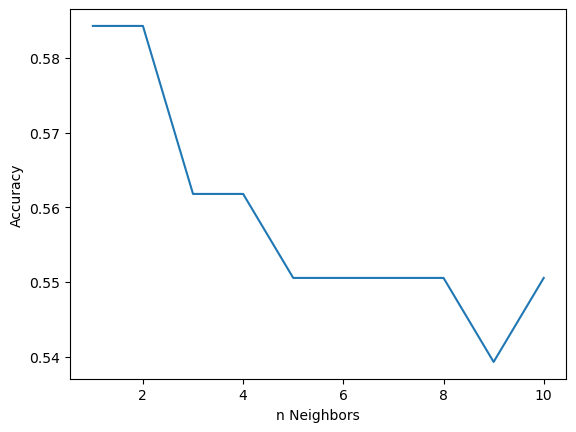

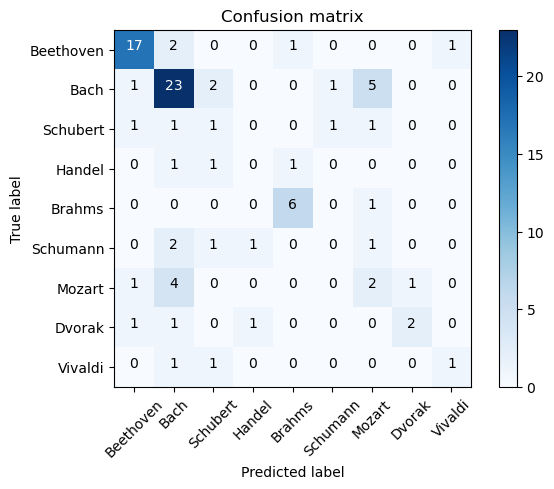

In [46]:
results_knn=[]
for i in range(1,11):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_x,train_y)
    results_knn.append(knn.score(test_x,test_y))
    
max_accuracy_knn=max(results_knn)
best_k=1+results_knn.index(max(results_knn))
print("Max Accuracy is {:.3f} on test dataset with {} neighbors.\n".format(max_accuracy_knn,best_k))

plt.plot(numpy.arange(1,11),results_knn)
plt.xlabel("n Neighbors")
plt.ylabel("Accuracy")

knn=KNeighborsClassifier(n_neighbors=best_k)
knn.fit(train_x,train_y)
print("Training Score: {:.3f}".format(knn.score(train_x,train_y)))
print("Test score: {:.3f}".format(knn.score(test_x,test_y)))  
plot_cnf(knn,test_x,test_y,composer_list)

Max Accuracy is 0.584 on test dataset with 7 estimators.

Training Score: 0.960
Test score: 0.584
---------------PERFORMANCE ANALYSIS FOR THE MODEL----------------

Real Test dataset labels: 
['Beethoven' 'Dvorak' 'Beethoven' 'Schumann' 'Beethoven' 'Beethoven'
 'Vivaldi' 'Beethoven' 'Beethoven' 'Beethoven' 'Brahms' 'Beethoven'
 'Handel' 'Beethoven' 'Beethoven' 'Schubert' 'Beethoven' 'Vivaldi' 'Bach'
 'Beethoven' 'Beethoven' 'Bach' 'Handel' 'Bach' 'Handel' 'Brahms' 'Bach'
 'Beethoven' 'Handel' 'Mozart' 'Mozart' 'Schubert' 'Schumann' 'Beethoven'
 'Beethoven' 'Beethoven' 'Beethoven' 'Schumann' 'Schumann' 'Beethoven'
 'Schubert' 'Dvorak' 'Beethoven' 'Bach' 'Dvorak' 'Schubert' 'Bach'
 'Mozart' 'Brahms' 'Bach' 'Bach' 'Beethoven' 'Beethoven' 'Schubert'
 'Beethoven' 'Bach' 'Beethoven' 'Bach' 'Bach' 'Handel' 'Beethoven'
 'Beethoven' 'Bach' 'Bach' 'Bach' 'Handel' 'Mozart' 'Schumann' 'Bach'
 'Beethoven' 'Brahms' 'Beethoven' 'Bach' 'Bach' 'Bach' 'Bach' 'Beethoven'
 'Schubert' 'Vivaldi' 'Brahms' 'S

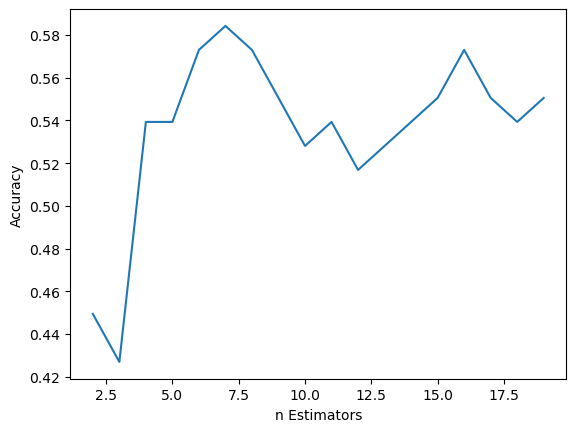

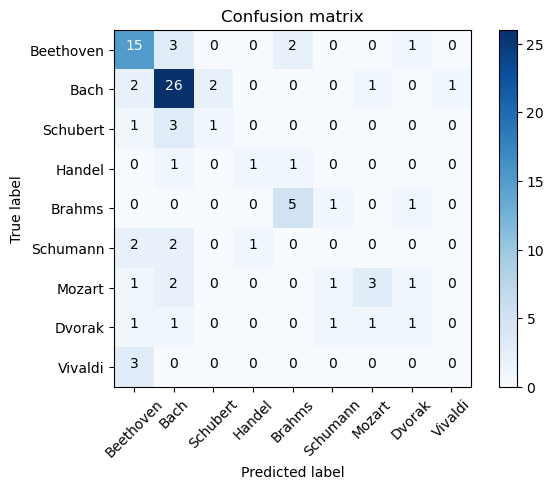

In [47]:
results_forest=[]
for i in range(2,20):
    forest=RandomForestClassifier(random_state=42,n_estimators=i)
    forest.fit(train_x,train_y)
    results_forest.append(forest.score(test_x,test_y))
    
max_accuracy_forest=max(results_forest)
best_n_est=2+results_forest.index(max(results_forest))
print("Max Accuracy is {:.3f} on test dataset with {} estimators.\n".format(max_accuracy_forest,best_n_est))

plt.plot(numpy.arange(2,20),results_forest)
plt.xlabel("n Estimators")
plt.ylabel("Accuracy")


forest=RandomForestClassifier(random_state=42,n_estimators=best_n_est)
forest.fit(train_x,train_y)
print("Training Score: {:.3f}".format(forest.score(train_x,train_y)))
print("Test score: {:.3f}".format(forest.score(test_x,test_y)))

plot_cnf(forest,test_x,test_y,composer_list)

Training Score: 0.997
Test score: 0.562
---------------PERFORMANCE ANALYSIS FOR THE MODEL----------------

Real Test dataset labels: 
['Beethoven' 'Dvorak' 'Beethoven' 'Schumann' 'Beethoven' 'Beethoven'
 'Vivaldi' 'Beethoven' 'Beethoven' 'Beethoven' 'Brahms' 'Beethoven'
 'Handel' 'Beethoven' 'Beethoven' 'Schubert' 'Beethoven' 'Vivaldi' 'Bach'
 'Beethoven' 'Beethoven' 'Bach' 'Handel' 'Bach' 'Handel' 'Brahms' 'Bach'
 'Beethoven' 'Handel' 'Mozart' 'Mozart' 'Schubert' 'Schumann' 'Beethoven'
 'Beethoven' 'Beethoven' 'Beethoven' 'Schumann' 'Schumann' 'Beethoven'
 'Schubert' 'Dvorak' 'Beethoven' 'Bach' 'Dvorak' 'Schubert' 'Bach'
 'Mozart' 'Brahms' 'Bach' 'Bach' 'Beethoven' 'Beethoven' 'Schubert'
 'Beethoven' 'Bach' 'Beethoven' 'Bach' 'Bach' 'Handel' 'Beethoven'
 'Beethoven' 'Bach' 'Bach' 'Bach' 'Handel' 'Mozart' 'Schumann' 'Bach'
 'Beethoven' 'Brahms' 'Beethoven' 'Bach' 'Bach' 'Bach' 'Bach' 'Beethoven'
 'Schubert' 'Vivaldi' 'Brahms' 'Schubert' 'Beethoven' 'Bach' 'Beethoven'
 'Mozart' 'Beethov

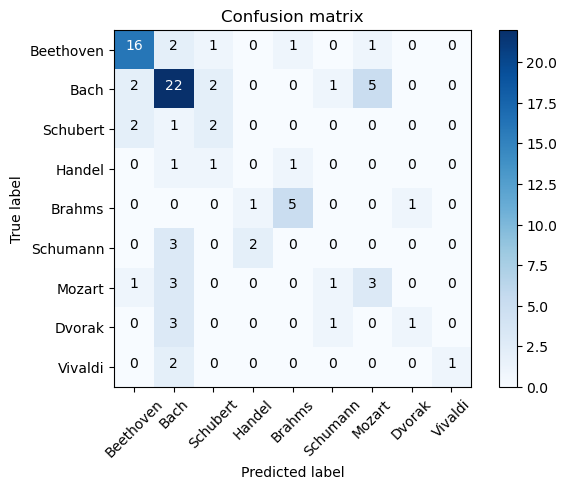

In [48]:
svm=SVC(C=100,gamma=0.08)
svm.fit(train_x,train_y)
print("Training Score: {:.3f}".format(svm.score(train_x,train_y)))
print("Test score: {:.3f}".format(svm.score(test_x,test_y)))

plot_cnf(svm,test_x,test_y,composer_list)

Training Score: 1.000
Test score: 0.539
---------------PERFORMANCE ANALYSIS FOR THE MODEL----------------

Real Test dataset labels: 
['Beethoven' 'Dvorak' 'Beethoven' 'Schumann' 'Beethoven' 'Beethoven'
 'Vivaldi' 'Beethoven' 'Beethoven' 'Beethoven' 'Brahms' 'Beethoven'
 'Handel' 'Beethoven' 'Beethoven' 'Schubert' 'Beethoven' 'Vivaldi' 'Bach'
 'Beethoven' 'Beethoven' 'Bach' 'Handel' 'Bach' 'Handel' 'Brahms' 'Bach'
 'Beethoven' 'Handel' 'Mozart' 'Mozart' 'Schubert' 'Schumann' 'Beethoven'
 'Beethoven' 'Beethoven' 'Beethoven' 'Schumann' 'Schumann' 'Beethoven'
 'Schubert' 'Dvorak' 'Beethoven' 'Bach' 'Dvorak' 'Schubert' 'Bach'
 'Mozart' 'Brahms' 'Bach' 'Bach' 'Beethoven' 'Beethoven' 'Schubert'
 'Beethoven' 'Bach' 'Beethoven' 'Bach' 'Bach' 'Handel' 'Beethoven'
 'Beethoven' 'Bach' 'Bach' 'Bach' 'Handel' 'Mozart' 'Schumann' 'Bach'
 'Beethoven' 'Brahms' 'Beethoven' 'Bach' 'Bach' 'Bach' 'Bach' 'Beethoven'
 'Schubert' 'Vivaldi' 'Brahms' 'Schubert' 'Beethoven' 'Bach' 'Beethoven'
 'Mozart' 'Beethov

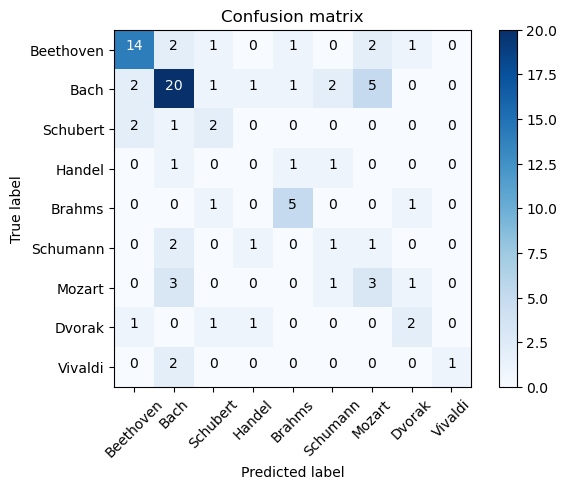

In [49]:
neural=MLPClassifier(max_iter=1000,random_state=2,hidden_layer_sizes=[40,40])
neural.fit(train_x,train_y)
print("Training Score: {:.3f}".format(neural.score(train_x,train_y)))
print("Test score: {:.3f}".format(neural.score(test_x,test_y)))

plot_cnf(neural,test_x,test_y,composer_list)